# Neural networks handcrafted

by Dominik Krzemiński
(21/11/18)

In [1]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

**Goal**: teach simple network XOR

![](img/nn1.png)

# Vanilla Neural Network

Below we create numerical representation of this simple problem:

In [2]:
X = [(0,0), (1,0), (0,1), (1,1)]
Y = [0, 1, 1, 0]

We wil use the following architecture:
![](img/nn2.png)
which gives number of parameters:
![](img/nn3.png)

Let's define our parameter vector in according to this. Additionaly I define $\eta$ learning rate. We will play around this later.

In [3]:
eta = 0.1

In [4]:
w1 = 2 * np.random.random(size=(2,3)) - 1
w2 = 2 * np.random.random(size=(3,1)) - 1
b1 = 2 * np.random.random(size=(1,3)) - 1
b2 = 2 * np.random.random(size=(1,1)) - 1

Typical neuron perform operation of sum of weighted input and thresholding the activation $a$.

![](img/nn4.png)

Our activation funtion is sigmoid (you can learn more here: https://en.wikipedia.org/wiki/Sigmoid_function):

![](img/nn5.png)

Let's compute the first derivative as we might need it later.

![](img/nn6.png)

Yeah, that's the good moment to appreciate simplicity of the above formula. That's one of the reasons why ML researchers like this function.

In [5]:
def sigmoid(x):
    return 1./(1 + np.exp(-x))

def dsigmoid(y):
    return y*(1-y)

In [6]:
x = np.array(X[0])
y = np.array(Y[0])

We perform forward pass first:

![](img/nn7.png)

In [7]:
act1 = np.dot(w1.T, x) + b1
lay1 = sigmoid(act1)

In [8]:
act2 = np.dot(w2.T, lay1.T) + b2
lay2 = sigmoid(act2)

Since we reched the last layer, we can compute the error of our prediction.
![](img/nn9.png)

In [9]:
E = 0.5 * (y - lay2)**2

Now, we propagate this error backwards, starting from the last layer. We need to use chain rule to get formula for the update.

For weights it looks like this:

![](img/nn10.png)

and for bias like this:

![](img/nn11.png)

In [10]:
delta_l2 = (y-lay2) * dsigmoid(act2)
corr_w2 = delta_l2 * lay1
corr_b2 = delta_l2 * 1

Finally, we can update our weights using the gradient descent. Note, how every word makes sense here.
- gradient $\frac{d E}{d w}$
- descent "-"

![](img/nn8.png)

In [11]:
w2 = w2 - eta * corr_w2.T
b2 = b2 - eta * corr_b2

Layer 1 update is a little bit more complicated, as we have to use chain rule twice:

![](img/nn12.png)

Try make it by yourself for bias.

![](img/nn13.png)


In [12]:
delta_l1 = np.dot(w2, delta_l2) * dsigmoid(act1).T
corr_w1 = np.outer(x, delta_l1)
corr_b1 = delta_l1 * 1

We update the parameters, similarly as above.

In [13]:
w1 = w1 - eta * corr_w1
b1 = b1 - eta * corr_b1.T

Finally, we can put that together:

In [14]:
# Number of epochs
# ... or in other words:
# how many times we show our network all examples
N = 10000 

error = np.zeros((N,1))

for n in range(N):
    for i in range(len(X)): # iterate over all examples
        x = np.array(X[i])
        y = np.array(Y[i])
        # Forward pass, 1st layer
        act1 = np.dot(w1.T, x) + b1
        lay1 = sigmoid(act1)
        # Forward pass, 2nd layer
        act2 = np.dot(w2.T, lay1.T) + b2
        lay2 = sigmoid(act2)
        # Computing error
        E = 0.5*(lay2 - y)**2
        error[n] += E[0]
        # Backprop, 2nd layer
        delta_l2 = (lay2-y) * dsigmoid(lay2)
        corr_w2 = (delta_l2 * lay1).T
        corr_b2 = delta_l2 * 1
        # Backprop, 1st layer
        delta_l1 = np.dot(w2, delta_l2) * dsigmoid(lay1).T
        corr_w1 = np.outer(x, delta_l1)
        corr_b1 = (delta_l1 * 1).T
        w2 = w2 - eta * corr_w2
        b2 = b2 - eta * corr_b2
        w1 = w1 - eta * corr_w1
        b1 = b1 - eta * corr_b1
        if n % 1000 == 0:
            print('| {}, {:.3f}'.format(y, lay2[0][0]), end='')
    if n % 1000 == 0:
        print(' <', '-' * 3, n)
    error[n] /= len(X)

| 0, 0.401| 1, 0.347| 1, 0.385| 0, 0.351 < --- 0
| 0, 0.502| 1, 0.477| 1, 0.518| 0, 0.506 < --- 1000
| 0, 0.484| 1, 0.476| 1, 0.525| 0, 0.522 < --- 2000
| 0, 0.421| 1, 0.489| 1, 0.565| 0, 0.557 < --- 3000
| 0, 0.233| 1, 0.528| 1, 0.693| 0, 0.589 < --- 4000
| 0, 0.143| 1, 0.581| 1, 0.765| 0, 0.487 < --- 5000
| 0, 0.105| 1, 0.786| 1, 0.810| 0, 0.258 < --- 6000
| 0, 0.068| 1, 0.860| 1, 0.868| 0, 0.170 < --- 7000
| 0, 0.050| 1, 0.893| 1, 0.898| 0, 0.131 < --- 8000
| 0, 0.040| 1, 0.911| 1, 0.915| 0, 0.108 < --- 9000


Text(0.5,0,'epoch')

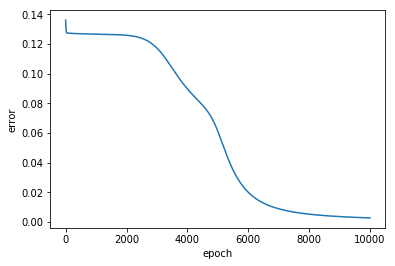

In [15]:
plt.plot(np.arange(N), error)
plt.ylabel('error')
plt.xlabel('epoch')

Above we implemeted so called stochastic gradient descent. We update weights right after seeing a new example.

Below we slightly change our code to follow batch gradient descent schema. We update parameters after seeing a batch of examples. In  our case all four.

In [16]:
w1 = 2 * np.random.random(size=(2,3)) - 1
w2 = 2 * np.random.random(size=(3,1)) - 1
b1 = 2 * np.random.random(size=(1,3)) - 1
b2 = 2 * np.random.random(size=(1,1)) - 1

In [17]:
N = 10000
error = np.zeros((N,1))
for n in range(N):
    Dw_1 = np.zeros((2,3))
    Dw_2 = np.zeros((3,1))
    Db_1 = np.zeros((1,3))
    Db_2 = np.zeros((1,1))

    for i in range(len(X)): # iterate over all examples
        x = np.array(X[i])
        y = np.array(Y[i])
        # Forward pass, 1st layer
        act1 = np.dot(w1.T, x) + b1
        lay1 = sigmoid(act1)
        # Forward pass, 2nd layer
        act2 = np.dot(w2.T, lay1.T) + b2
        lay2 = sigmoid(act2)
        # Computing error
        E = 0.5*(lay2 - y)**2
        error[n] += E[0]
        # Backprop, 2nd layer
        delta_l2 = (lay2-y) * dsigmoid(lay2)
        corr_w2 = (delta_l2 * lay1).T
        corr_b2 = delta_l2 * 1
        # Backprop, 1st layer
        delta_l1 = np.dot(w2, delta_l2) * dsigmoid(lay1).T
        corr_w1 = np.outer(x, delta_l1)
        corr_b1 = (delta_l1 * 1).T
        Dw_2 += corr_w2
        Dw_1 += corr_w1
        Db_2 += corr_b2
        Db_1 += corr_b1
        if n % 1000 == 0:
            print('| {}, {:.3f}'.format(y, lay2[0][0]), end='')
    if n % 1000 == 0:
        print(' <', '-' * 3, n)
    w2 = w2 - eta * Dw_2
    b2 = b2 - eta * Db_2
    w1 = w1 - eta * Dw_1
    b1 = b1 - eta * Db_1
    error[n] /= len(X)

| 0, 0.619| 1, 0.594| 1, 0.623| 0, 0.597 < --- 0
| 0, 0.507| 1, 0.481| 1, 0.522| 0, 0.489 < --- 1000
| 0, 0.490| 1, 0.455| 1, 0.575| 0, 0.472 < --- 2000
| 0, 0.340| 1, 0.562| 1, 0.735| 0, 0.339 < --- 3000
| 0, 0.140| 1, 0.824| 1, 0.863| 0, 0.162 < --- 4000
| 0, 0.087| 1, 0.889| 1, 0.908| 0, 0.108 < --- 5000
| 0, 0.066| 1, 0.915| 1, 0.928| 0, 0.085 < --- 6000
| 0, 0.054| 1, 0.929| 1, 0.939| 0, 0.072 < --- 7000
| 0, 0.047| 1, 0.938| 1, 0.947| 0, 0.063 < --- 8000
| 0, 0.041| 1, 0.945| 1, 0.952| 0, 0.057 < --- 9000


Text(0.5,0,'epoch')

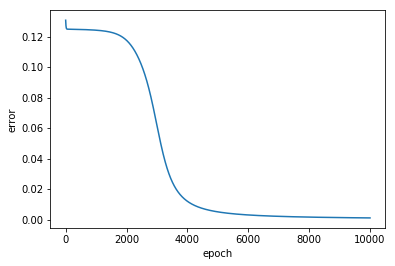

In [18]:
plt.plot(np.arange(N), error)
plt.ylabel('error')
plt.xlabel('epoch')

# Vanilla Recurrent Neural Network

Some people think that RNN are more difficult to understand. Well... conceptually there are some nuances, but implementation is not that difficult.

First of all, we need to change the way we think about our problem. Now our $X$ is not simply a pair of numbers, but sequence.

```
0 -> 0 -> 0
1 -> 0 -> 1
0 -> 1 -> 1
1 -> 1 -> 0
```

So the rule is, if our sequence of 2 bits consists of the same vales we return 0, if bits differ then we have 1.

Let's try to teach our network that.

Our architecture looks like this:

![](img/nn14.png)

Quite similar, isn't it?

The only difference is recurrent layer with parameters $w_h$ and $b_h$.

In [19]:
w1 = 2 * np.random.random(size=(2,3)) - 1
w2 = 2 * np.random.random(size=(3,1)) - 1
b1 = 2 * np.random.random(size=(1,3)) - 1
b2 = 2 * np.random.random(size=(1,1)) - 1

In [20]:
wh = 2 * np.random.random(size=(3,3)) - 1
bh = 2 * np.random.random(size=(1,3)) - 1

Since the architecture is so similar, it's easy to guess that most of the equations stay the same.

Obviously, there is a difference in layer 1:

![](img/nn15.png)

The update rules for $w_1$, $w_2$, $b_1$ and $b_2$ look exactly the same. We need to add update rule for recurrent hidden layer.

![](img/nn16.png)

After adjusting the code, we have:

In [21]:
lay1_prev = np.zeros((1,3))

In [22]:
N = 10000
error = np.zeros((N,1))
for n in range(N):
    for i in range(len(X)):
        x = np.array(X[i])
        y = np.array(Y[i])
        # Forward pass, 1st layer
        act1 = np.dot(w1.T, x) + b1 + np.dot(wh, lay1_prev.T).T + bh # ! NEW
        lay1 = sigmoid(act1)
        # Forward pass, 2nd layer
        act2 = np.dot(w2.T, lay1.T) + b2
        lay2 = sigmoid(act2)
        # Computing error
        E = 0.5*(lay2 - y)**2
        error[n] += E[0]
        # Backprop, 2nd layer
        delta_l2 = (lay2-y) * dsigmoid(lay2)
        corr_w2 = (delta_l2 * lay1).T
        corr_b2 = delta_l2 * 1
        # Backprop, 1st layer
        delta_l1 = np.dot(w2, delta_l2) * dsigmoid(lay1).T
        corr_w1 = np.outer(x, delta_l1)
        corr_b1 = (delta_l1 * 1).T
        # Backprob, recurrent layer
        corr_wh = np.outer(lay1_prev, delta_l1) # ! NEW
        corr_bh = (delta_l1 * 1).T              # ! NEW
        w2 = w2 - eta * corr_w2
        b2 = b2 - eta * corr_b2
        w1 = w1 - eta * corr_w1
        b1 = b1 - eta * corr_b1
        wh = wh - eta * corr_wh # ! NEW
        bh = bh - eta * corr_bh # ! NEW
        if n % 1000 == 0:
            print('| {}, {:.3f}'.format(y, lay2[0][0]), end='')
    if n % 1000 == 0:
        print(' <', '-' * 3, n)
    error[n] /= len(X)

| 0, 0.503| 1, 0.443| 1, 0.492| 0, 0.457 < --- 0
| 0, 0.498| 1, 0.493| 1, 0.505| 0, 0.505 < --- 1000
| 0, 0.443| 1, 0.515| 1, 0.510| 0, 0.536 < --- 2000
| 0, 0.256| 1, 0.622| 1, 0.591| 0, 0.599 < --- 3000
| 0, 0.175| 1, 0.763| 1, 0.721| 0, 0.380 < --- 4000
| 0, 0.111| 1, 0.881| 1, 0.847| 0, 0.184 < --- 5000
| 0, 0.082| 1, 0.920| 1, 0.892| 0, 0.123 < --- 6000
| 0, 0.066| 1, 0.938| 1, 0.914| 0, 0.096 < --- 7000
| 0, 0.057| 1, 0.948| 1, 0.927| 0, 0.081 < --- 8000
| 0, 0.050| 1, 0.955| 1, 0.936| 0, 0.070 < --- 9000


Text(0.5,0,'epoch')

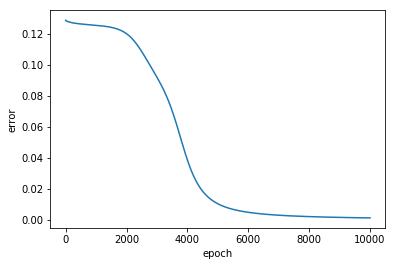

In [23]:
plt.plot(np.arange(N), error)
plt.ylabel('error')
plt.xlabel('epoch')